-2


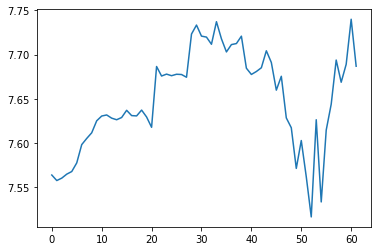

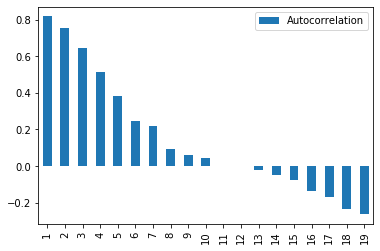

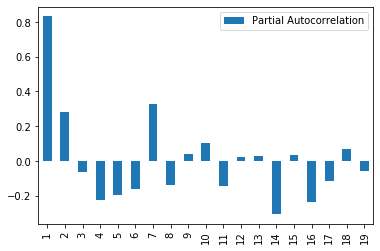

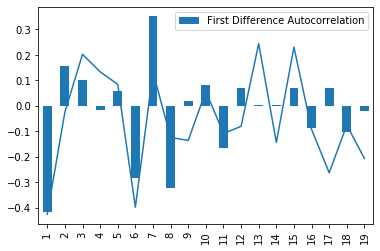

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   61
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 124.949
Method:                           css   S.D. of innovations              0.031
Date:                Thu, 02 Apr 2020   AIC                           -245.898
Time:                        19:20:56   BIC                           -241.676
Sample:                             1   HQIC                          -244.243
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.004      0.505      0.616      -0.006       0.010


C:\Users\Arjun Janamatti\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


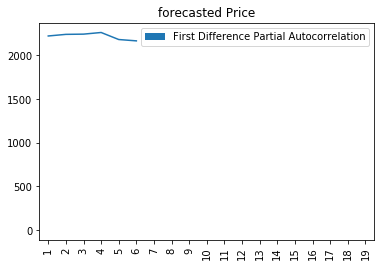

-3


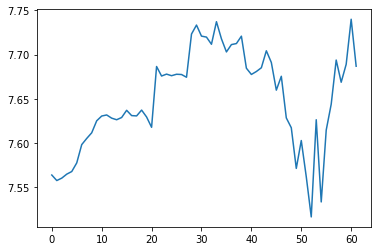

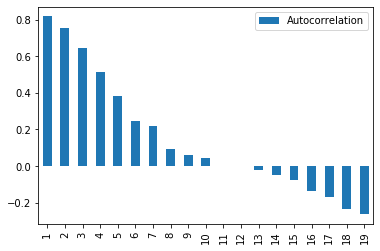

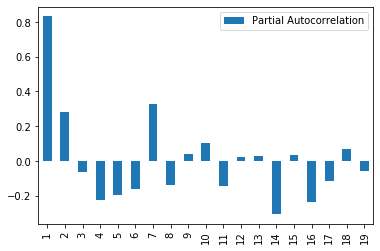

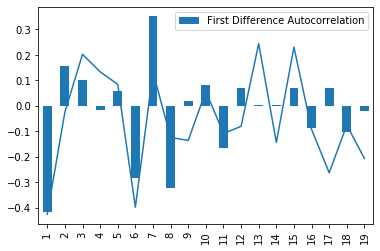

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   61
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 124.949
Method:                           css   S.D. of innovations              0.031
Date:                Thu, 02 Apr 2020   AIC                           -245.898
Time:                        19:20:57   BIC                           -241.676
Sample:                             1   HQIC                          -244.243
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.004      0.505      0.616      -0.006       0.010


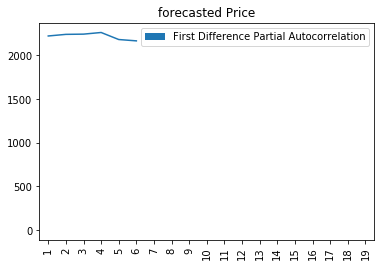

-4


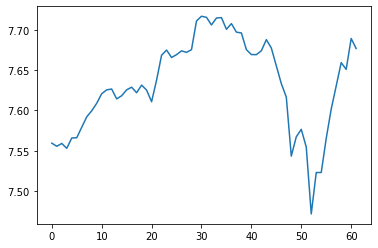

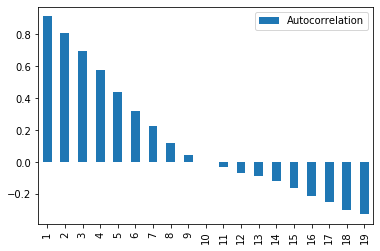

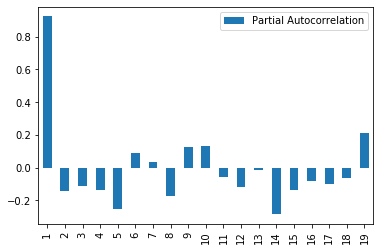

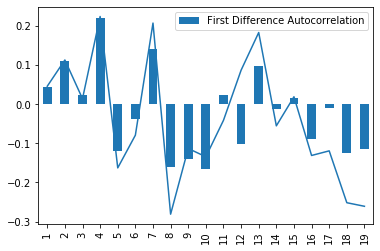

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   61
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 146.277
Method:                           css   S.D. of innovations              0.022
Date:                Thu, 02 Apr 2020   AIC                           -288.555
Time:                        19:20:58   BIC                           -284.333
Sample:                             1   HQIC                          -286.900
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.003      0.684      0.497      -0.004       0.007


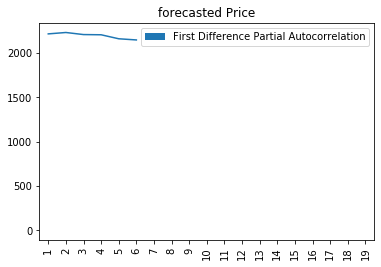

-5


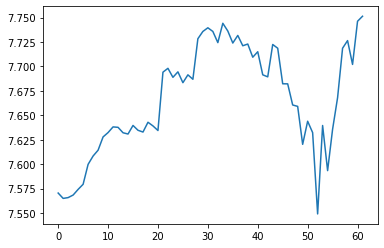

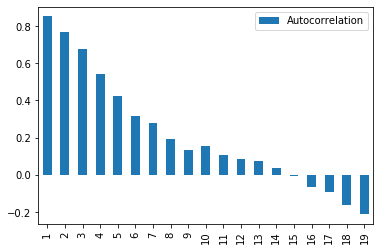

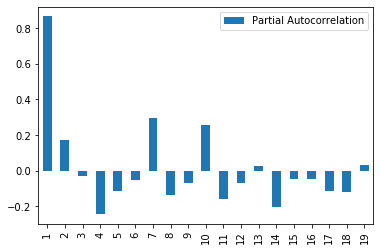

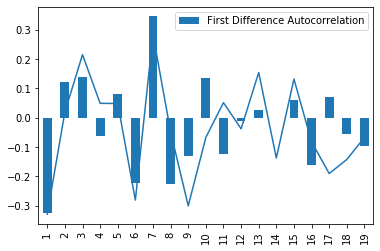

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   61
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 138.247
Method:                           css   S.D. of innovations              0.025
Date:                Thu, 02 Apr 2020   AIC                           -272.494
Time:                        19:20:58   BIC                           -268.273
Sample:                             1   HQIC                          -270.840
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.003      0.924      0.359      -0.003       0.009


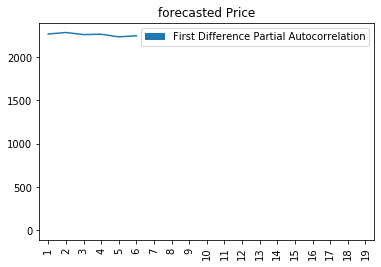

-6


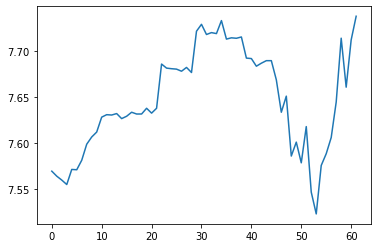

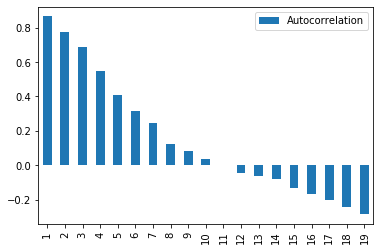

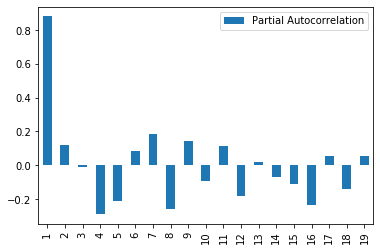

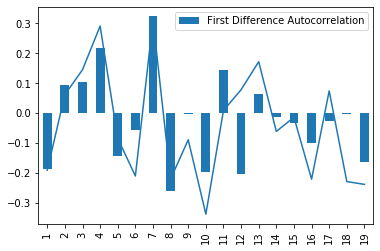

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   61
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 139.902
Method:                           css   S.D. of innovations              0.024
Date:                Thu, 02 Apr 2020   AIC                           -275.803
Time:                        19:20:59   BIC                           -271.581
Sample:                             1   HQIC                          -274.149
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.003      0.882      0.381      -0.003       0.009


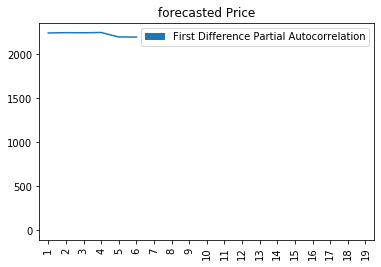

In [20]:
import os
os.chdir("C:/Users/Arjun Janamatti/Downloads/Data sets 01042020/Data sets 01042020/")
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

variables = pd.read_csv("HINDUNILVR.NS__Set2.csv")
for i in range(-2,-7,-1):
    print(i)
    column_to_be_checked = variables.columns[i]
    price = variables[column_to_be_checked]
    lnprice = np.log(price)
    plt.plot(lnprice)
    plt.show()
    acf_1 = acf(lnprice)[1:20]
    test_df = pd.DataFrame([acf_1]).T
    test_df.columns = ["Autocorrelation"]
    test_df.index = test_df.index + 1
    test_df.plot(kind = "bar")
    plt.show()
    pacf_1 = pacf(lnprice)[1:20]
    test_df = pd.DataFrame([pacf_1]).T
    test_df.columns = ["Partial Autocorrelation"]
    test_df.index = test_df.index + 1
    test_df.plot(kind = "bar")
    plt.show()
    result = ts.adfuller(lnprice,1)
    result
    lnprice_diff = lnprice - lnprice.shift()
    diff = lnprice_diff.dropna()
    acf_1_diff = acf(diff)[1:20]
    test_df = pd.DataFrame([acf_1_diff]).T
    test_df.columns = ["First Difference Autocorrelation"]
    test_df.index += 1
    test_df.plot(kind="bar")
    pacf_1_diff = pacf(diff)[1:20]
    plt.plot(pacf_1_diff)
    plt.show()
    test_df = pd.DataFrame([pacf_1_diff]).T
    test_df.columns = ["First Difference Partial Autocorrelation"]
    test_df.index += 1
    test_df.plot(kind="bar")
    price_matrix = lnprice.as_matrix()
    model = ARIMA(price_matrix, order = (0,1,0))
    model_fit = model.fit(disp = 0)
    print(model_fit.summary())
    predictions = model_fit.predict(36,41, typ="levels")
    predictions
    predictionsadjusted = np.exp(predictions)
    predictionsadjusted
    plt.plot(predictionsadjusted)
    plt.title("forecasted Price")
    plt.show()
    np.savetxt("saved_data_{0}.txt".format(column_to_be_checked),predictionsadjusted,fmt = "%6.5d")